## This script creates the plots for the:
## Supplementary Fig. 1 of RIDER Exp. 1

Here we perform an exploratory inspection of prototypical orientation biases (cardinal biases and oblique effects) in Working Memory (WM) and Long-term memory (LTM) reports.

We use Python (instead of R like for the other plots) here, as the matplotlib visualizations of the polar plots seem easier to customize to our needs compared to the ggplot functions.



In [204]:
## Prepare environment
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
from os.path import join as opj
import seaborn as sns
import os
import sys
import pandas as pd
import scipy.stats as st
from os import path as op
from random import randrange
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter, MultipleLocator
import matplotlib.pyplot as plt
import numpy as np

import math 

%matplotlib inline
%config InlineBackend.figure_format='svg'
plt.rcParams['font.family'] = 'Helvetica'


### In the following, we are defining the **cardinal_repulsion** function, which holds the code to plot the (repulsive) cardinal bias

## First, for the WM data:

### Importing the WM data

In [207]:

df_group = pd.read_csv('/your/path/to/mean/signed_erros/mean_error_by_orientation.csv')
# Check the data
print(df_group)

    orientation  mean_signed_error  mean_abs_error  sem_signed_error  \
0         11.25          -0.025617        0.224671          0.022285   
1         33.75          -0.011176        0.273596          0.024769   
2         56.25          -0.071168        0.289822          0.020703   
3         78.75          -0.015243        0.305053          0.026170   
4        101.25           0.041168        0.308334          0.030473   
5        123.75          -0.021001        0.287297          0.025003   
6        146.25          -0.004565        0.239747          0.022868   
7        168.75           0.020960        0.220752          0.020160   
8        191.25           0.003911        0.211899          0.018837   
9        213.75           0.006401        0.236468          0.022974   
10       236.25          -0.006537        0.293233          0.025001   
11       258.75           0.046353        0.307258          0.029823   
12       281.25           0.037212        0.293500          0.02

### Plotting the signed errors in WM 

[  78.75   56.25   33.75   11.25  -11.25  -33.75  -56.25  -78.75 -101.25
 -123.75 -146.25 -168.75 -191.25 -213.75 -236.25 -258.75   78.75]
[  84.09565027   36.68864377  233.63076232   50.03981719 -135.14657182
   68.94221616   14.98601099  -68.8076211   -12.83905563  -21.01324345
   21.45970511 -152.16792274 -122.1597899  -223.26037706 -227.22600713
   54.36327316   84.09565027]


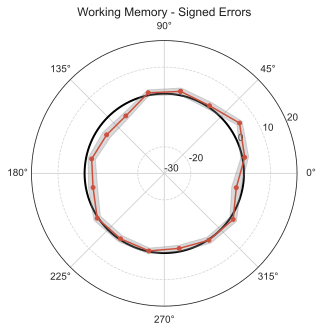

In [346]:
# Define GREY12 color and style settings
GREY12 = "#1f1f1f"
plt.rcParams["text.color"] = GREY12
plt.rc("axes", unicode_minus=False)

# Assuming df_group is your DataFrame
df_group = pd.DataFrame({
    'orientation': [11.25, 33.75, 56.25, 78.75, 101.25, 123.75, 146.25, 168.75, 
                    191.25, 213.75, 236.25, 258.75, 281.25, 303.75, 326.25, 348.75],
    'mean_signed_error': [-0.025617, -0.011176, -0.071168, -0.015243, 0.041168, 
                          -0.021001, -0.004565, 0.020960, 0.003911, 0.006401, 
                          -0.006537, 0.046353, 0.037212, 0.068009, 0.069217, -0.016560],
    'mean_abs_error': [0.224671, 0.273596, 0.289822, 0.305053, 0.308334, 
                       0.287297, 0.239747, 0.220752, 0.211899, 0.236468, 
                       0.293233, 0.307258, 0.293500, 0.354062, 0.245045, 0.187613],
    'sem_signed_error': [0.022285, 0.024769, 0.020703, 0.026170, 0.030473, 
                         0.025003, 0.022868, 0.020160, 0.018837, 0.022974, 
                         0.025001, 0.029823, 0.024649, 0.029396, 0.023248, 0.019338],
    'sem_abs_error': [0.020350, 0.022127, 0.017382, 0.022563, 0.026355, 
                      0.021638, 0.020299, 0.017800, 0.016335, 0.020467, 
                      0.021605, 0.026381, 0.020706, 0.024972, 0.020793, 0.017254]
})

df_group['orientation'] = np.radians(df_group['orientation'])
df_group['mean_signed_error'] = np.degrees(df_group['mean_signed_error'])
df_group['sem_signed_error'] = np.degrees(df_group['sem_signed_error'])
y_sem = df_group['sem_signed_error']

x = np.append(df_group['orientation'], df_group['orientation'][0])
y = np.append(df_group['mean_signed_error'], df_group['mean_signed_error'][0])
x = -x + np.pi/2
y = -y


print(np.degrees(x))
print(np.degrees(y))

y_sem = np.append(y_sem, y_sem[0])

# Calculate the upper and lower bounds for the SEM band
y_upper = y + y_sem
y_lower = y - y_sem
    
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.plot(x, y, color = '#CC503E', marker = 'o', linestyle = '-', linewidth = 1.5, markersize = 4)
# Plot the error band (SEM)
ax.fill_between(x, y + y_sem,y - y_sem, color='gray', alpha=0.3)

# Add a thicker, dashed gridline for the 0 level
gridlines = ax.yaxis.get_gridlines()
for gridline in gridlines:
    gridline.set_linestyle("--")  # Set dashed lines for all gridlines
    gridline.set_color("lightgrey")  # Set all gridlines to light grey
    gridline.set_linewidth(0.75)  # Set the default line width

# Highlight the 0-level gridline
gridlines[2].set_color("black")  # Set the 0-level gridline to black
gridlines[2].set_linestyle("-")  # Solid line
gridlines[2].set_linewidth(2)  # Thicker line

ax.set_rmax(20)
#ax.set_theta_offset(np.pi/4) 
#ax.set_theta_direction(1) 
#ax.set_theta_direction(1)
ax.set_rticks([-30, -20, 0, 10, 20])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title('Working Memory - Signed Errors')
plt.show()  # Display the plot

fig.savefig('WM_Signed_Errors_High_Res.png', dpi=300, bbox_inches='tight')



### In the following, we are defining the **oblique_effect** function, which holds the code to plot the ‘oblique effect’ (if existent), which refers to higher precision (lower absolute error) near the cardinal axes.

## For the WM data

In [209]:
def oblique_effect(ax, df, ylim = np.pi/10, offset = np.pi/1):
    """
    Produce a polar plots with the repulsion error compared to the canonical expected distance

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    df : dataframe
        data to plot

    ylim: float, optional
        Sets the lower and upper bounds of the y axis. The default is pi/8.
        
    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is pi/2.

    Returns
    -------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').
    """

    # get target orientations for x axis
    x = df['orientation'].to_numpy()

    # get mean response error for y axis, with directionality
    y = df['mean_abs_error'].to_numpy()

    y_sem = df['sem_abs_error'].to_numpy()  #

    # Colors
    #COLORS = ["#5F4690", "#1D6996", "#38A6A5", "#0F8554", "#73AF48", 
    #        "#EDAD08", "#E17C05", "#CC503E", "#94346E", "#666666"

    # Plot data on ax

    
    #ax.scatter(x, y, linewidth = 1, color = ["#CC503E"], alpha = 0.7)
    
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    y_sem = np.append(y_sem, y_sem[0])

    # Calculate the upper and lower bounds for the SEM band
    y_upper = y + y_sem
    y_lower = y - y_sem
    
    ax.plot(x, y, color = '#CC503E', marker = 'o', linestyle = '-', linewidth = 1.5, markersize = 4)

    # Plot the error band (SEM)
    ax.fill_between(x, y_lower, y_upper, color='gray', alpha=0.3)
    
    origin_offset = 0.1

    ylim_lab_min = '-pi/10'
    ylim_lab_max = 'pi/10'
    
    # change labels and limits if eeded
    if (ylim !=  np.pi/10):
        ylim = max(y)  # No need for abs, since absolute errors are all positive
        ylim_lab_max = f'{ylim:.2f}'

  
    # Set the direction of the zero angle
    ax.set_theta_offset(np.pi/1) 
    ax.set_theta_direction(-1) 
    
    # define ticks for y and x axis
    ax.set_yticks([0, ylim/2, ylim])  # Ticks from 0 to max, spaced evenly
    ax.set_ylim(0, ylim + origin_offset)  # Start y-axis from 0, no negative values
    ax.set_yticklabels(['0', f'{ylim/2:.2f}', ylim_lab_max])  # Label the y-ticks
    ax.tick_params(axis='y', which='major', labelsize=12)


    # Convert radians to degrees for the angular axis (x-axis)
    angles = np.degrees(x)

    # Set gridlines for all angles (every 30 degrees for example)
    ax.set_xticks(np.radians(np.arange(0, 360, 30)))
    ax.set_xticklabels([f'{int(a)}°' for a in np.arange(0, 360, 30)], fontsize=10)

    # Highlight cardinal axes gridlines (0°, 90°, 180°, 270°)
    cardinal_angles = np.radians([0, 90, 180, 270])
    for angle in cardinal_angles:
        ax.plot([angle, angle], [0, ylim], color='k', linewidth=0.5, linestyle='-')  # Thicker, dashed cardinal axes

    # Remove the polar spine and customize regular radial gridlines
    ax.spines['polar'].set_visible(False)

    # Get gridlines and ensure outer gridline is visible
    gridlines = ax.yaxis.get_gridlines()
    for i, gridline in enumerate(gridlines):
        if i == 2:  # The outermost gridline
            gridline.set_color("black")  # Set it to black for visibility
            gridline.set_linewidth(1)  # Make it thicker for emphasis
        if i == 3:  # The outermost gridline
            gridline.set_color("black")  # Set it to black for visibility
            gridline.set_linewidth(1)  # Make it thicker for emphasis
        else:
            gridline.set_color("grey")  # Keep other gridlines in grey
            gridline.set_linestyle("-")  # Dotted lines for other gridlines
            gridline.set_linewidth(0.75)  # Standard thickness

    return ax

### Plotting the absolut errors in WM 

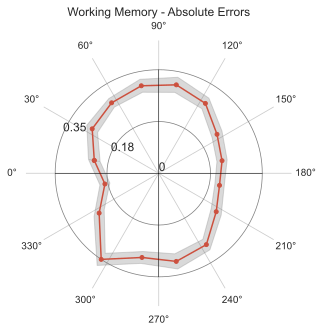

In [210]:
# Assuming df_group is your DataFrame
df_group = pd.DataFrame({
    'orientation': [11.25, 33.75, 56.25, 78.75, 101.25, 123.75, 146.25, 168.75, 
                    191.25, 213.75, 236.25, 258.75, 281.25, 303.75, 326.25, 348.75],
    'mean_signed_error': [-0.025617, -0.011176, -0.071168, -0.015243, 0.041168, 
                          -0.021001, -0.004565, 0.020960, 0.003911, 0.006401, 
                          -0.006537, 0.046353, 0.037212, 0.068009, 0.069217, -0.016560],
    'mean_abs_error': [0.224671, 0.273596, 0.289822, 0.305053, 0.308334, 
                       0.287297, 0.239747, 0.220752, 0.211899, 0.236468, 
                       0.293233, 0.307258, 0.293500, 0.354062, 0.245045, 0.187613],
    'sem_signed_error': [0.022285, 0.024769, 0.020703, 0.026170, 0.030473, 
                         0.025003, 0.022868, 0.020160, 0.018837, 0.022974, 
                         0.025001, 0.029823, 0.024649, 0.029396, 0.023248, 0.019338],
    'sem_abs_error': [0.020350, 0.022127, 0.017382, 0.022563, 0.026355, 
                      0.021638, 0.020299, 0.017800, 0.016335, 0.020467, 
                      0.021605, 0.026381, 0.020706, 0.024972, 0.020793, 0.017254]
})

# Convert orientation from degrees to radians for proper polar plotting
df_group['orientation'] = np.radians(df_group['orientation'])

# Calculate the dynamic y-axis limits based on the actual data range for absolute errors
max_abs_error = max(df_group['mean_abs_error'])

# Set plot style to white background
sns.set_style("white")

# Create the polar plot
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))  # create polar plot
fig.patch.set_facecolor("white")  # Set background color to white, both axis and figure

# Use the modified `circular_repulsion` function for abs errors
# We now pass is_abs_error=True to avoid negative y-values
oblique_effect(ax, df_group, ylim=max_abs_error)

# Set the title and show the plot
plt.title('Working Memory - Absolute Errors')
plt.show()  # Display the plot

fig.savefig('WM_abs_Errors_High_Res.png', dpi=300, bbox_inches='tight')


### Importing the LTM data

We want to look at both cadinal bias and oblique effects also on the LTM data

In [211]:
## Now I am importing the LTM data
df_ltm = pd.read_csv('/your/path/to/mean/signed_erros/LTM_orientation_summary.csv')

# Convert orientation from degrees to radians for polar plotting
#df_ltm['fixedOri_ltm'] = np.radians(df_ltm['fixedOri_ltm'])
df_ltm

,fixedOri_ltm,mean_signed_error,mean_abs_error,sem_signed_error,sem_abs_error
0,11.25,0.028359,0.936190,0.049996,0.036950
1,33.75,0.106345,1.012937,0.051459,0.036136
2,56.25,0.036779,1.100357,0.051459,0.033595
3,78.75,0.153948,1.020583,0.053156,0.036205
4,101.25,0.127905,1.063531,0.061495,0.040722
5,123.75,0.088359,0.993344,0.051966,0.035328
6,146.25,0.074537,0.896154,0.049409,0.035216
7,168.75,0.030901,0.836038,0.048448,0.036626
8,191.25,-0.058689,0.772043,0.046327,0.035253
9,213.75,0.015557,0.845933,0.048490,0.035318


#### Adjusting the circular_repulsion function to nicely plot the LTM data

### Plotting the LTM signed errors

[  78.75   56.25   33.75   11.25  -11.25  -33.75  -56.25  -78.75 -101.25
 -123.75 -146.25 -168.75 -191.25 -213.75 -236.25 -258.75   78.75]
[ -93.09710528 -349.11004129 -120.73833475 -505.38147197 -419.8873462
 -290.06548628 -244.69053691 -101.44199902  192.66462188  -51.07061839
   46.940848    363.51827836  238.08881334  300.00582391  356.88372673
  553.77988599  -93.09710528]


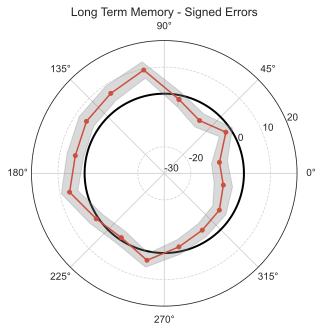

In [345]:

# Assuming df_group is your DataFrame
df_group = pd.DataFrame({
    'orientation': [11.25, 33.75, 56.25, 78.75, 101.25, 123.75, 146.25, 168.75, 
                    191.25, 213.75, 236.25, 258.75, 281.25, 303.75, 326.25, 348.75],
    'mean_signed_error': [0.028359, 0.106345, 0.036779, 0.153948, 0.127905, 
                          0.088359, 0.074537, 0.030901, -0.058689, 0.015557, 
                          -0.014299, -0.110734, -0.072526, -0.091387, -0.108713, -0.168691],
    'mean_abs_error': [0.936190, 1.012937, 1.100357, 1.020583, 1.063531, 
                       0.993344, 0.896154, 0.836038, 0.772043, 0.845933, 
                       0.979448, 0.988939, 1.025381, 1.092884, 1.041389, 0.882569],
    'sem_signed_error': [0.049996, 0.051459, 0.051459, 0.053156, 0.061495, 
                         0.051966, 0.049409, 0.048448, 0.046327, 0.048490, 
                         0.050759, 0.054979, 0.055642, 0.056915, 0.057491, 0.054665],
    'sem_abs_error': [0.036950, 0.036136, 0.033595, 0.036205, 0.040722, 
                      0.035328, 0.035216, 0.036626, 0.035253, 0.035318, 
                      0.034817, 0.037838, 0.037049, 0.037423, 0.040619, 0.041480]
})


df_group['orientation'] = np.radians(df_group['orientation'])
df_group['mean_signed_error'] = np.degrees(df_group['mean_signed_error'])
df_group['sem_signed_error'] = np.degrees(df_group['sem_signed_error'])
y_sem = df_group['sem_signed_error']

x = np.append(df_group['orientation'], df_group['orientation'][0])
y = np.append(df_group['mean_signed_error'], df_group['mean_signed_error'][0])
x = -x + np.pi/2
y = -y


print(np.degrees(x))
print(np.degrees(y))

y_sem = np.append(y_sem, y_sem[0])

# Calculate the upper and lower bounds for the SEM band
y_upper = y + y_sem
y_lower = y - y_sem
    
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.plot(x, y, color = '#CC503E', marker = 'o', linestyle = '-', linewidth = 1.5, markersize = 4)
# Plot the error band (SEM)
ax.fill_between(x, y + y_sem,y - y_sem, color='gray', alpha=0.3)

# Add a thicker, dashed gridline for the 0 level
gridlines = ax.yaxis.get_gridlines()
for gridline in gridlines:
    gridline.set_linestyle("--")  # Set dashed lines for all gridlines
    gridline.set_color("lightgrey")  # Set all gridlines to light grey
    gridline.set_linewidth(0.75)  # Set the default line width

# Highlight the 0-level gridline
gridlines[2].set_color("black")  # Set the 0-level gridline to black
gridlines[2].set_linestyle("-")  # Solid line
gridlines[2].set_linewidth(2)  # Thicker line

ax.set_rmax(20)
#ax.set_theta_offset(np.pi/4) 
#ax.set_theta_direction(1) 
#ax.set_theta_direction(1)
ax.set_rticks([-30, -20, 0, 10, 20])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title('Long Term Memory - Signed Errors')
plt.show()  # Display the plot

fig.savefig('LTM_Signed_Errors_High_Res.png', dpi=300, bbox_inches='tight')

### Spearman's rank correlation between signed errors of WM and LTM

WM Signed Errors:
[-0.025617 -0.011176 -0.071168 -0.015243  0.041168 -0.021001 -0.004565
  0.02096   0.003911  0.006401 -0.006537  0.046353  0.037212  0.068009
  0.069217 -0.01656 ]

LTM Signed Errors:
[ 0.028359  0.106345  0.036779  0.153948  0.127905  0.088359  0.074537
  0.030901 -0.058689  0.015557 -0.014299 -0.110734 -0.072526 -0.091387
 -0.108713 -0.168691]


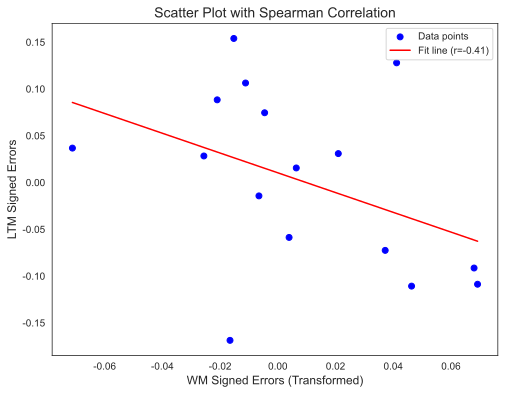

Spearman correlation: -0.41, p-value: 0.113


In [215]:

from scipy.stats import spearmanr

# Data for transformed signed errors (WM and LTM)
wm_signed_errors = np.array([-0.025617, -0.011176, -0.071168, -0.015243, 0.041168, 
                          -0.021001, -0.004565, 0.020960, 0.003911, 0.006401, 
                          -0.006537, 0.046353, 0.037212, 0.068009, 0.069217, -0.016560])

ltm_signed_errors = np.array([0.028359, 0.106345, 0.036779, 0.153948, 0.127905, 
                          0.088359, 0.074537, 0.030901, -0.058689, 0.015557, 
                          -0.014299, -0.110734, -0.072526, -0.091387, -0.108713, -0.168691])

# Calculate Spearman correlation
correlation, p_value = spearmanr(wm_signed_errors, ltm_signed_errors)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(wm_signed_errors, ltm_signed_errors, color='blue', label='Data points')

# Fit a regression line (using numpy polyfit to approximate it)
z = np.polyfit(wm_signed_errors, ltm_signed_errors, 1)
p = np.poly1d(z)
plt.plot(wm_signed_errors, p(wm_signed_errors), color='red', label=f'Fit line (r={correlation:.2f})')

# Add labels and title
plt.xlabel('WM Signed Errors (Transformed)', fontsize=12)
plt.ylabel('LTM Signed Errors', fontsize=12)
plt.title('Scatter Plot with Spearman Correlation', fontsize=14)
plt.legend()

# Show the plot
plt.show()

# Print Spearman correlation results
print(f'Spearman correlation: {correlation:.2f}, p-value: {p_value:.3f}')



### And plot oblique effects in LTM

In [239]:
def oblique_effect(ax, df, ylim = np.pi/10, offset = np.pi/1):
    """
    Produce a polar plots with the repulsion error compared to the canonical expected distance

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    df : dataframe
        data to plot

    ylim: float, optional
        Sets the lower and upper bounds of the y axis. The default is pi/8.
        
    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is pi/2.

    Returns
    -------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').
    """

    # get target orientations for x axis
    x = df['orientation'].to_numpy()

    # get mean response error for y axis, with directionality
    y = df['mean_abs_error'].to_numpy()

    y_sem = df['sem_abs_error'].to_numpy()  #

    # Colors
    #COLORS = ["#5F4690", "#1D6996", "#38A6A5", "#0F8554", "#73AF48", 
    #        "#EDAD08", "#E17C05", "#CC503E", "#94346E", "#666666"

    # Plot data on ax

    
    #ax.scatter(x, y, linewidth = 1, color = ["#CC503E"], alpha = 0.7)
    
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    y_sem = np.append(y_sem, y_sem[0])

    # Calculate the upper and lower bounds for the SEM band
    y_upper = y + y_sem
    y_lower = y - y_sem
    
    ax.plot(x, y, color = '#CC503E', marker = 'o', linestyle = '-', linewidth = 1.5, markersize = 4)

    # Plot the error band (SEM)
    ax.fill_between(x, y_lower, y_upper, color='gray', alpha=0.3)
    
    origin_offset = 0.1

    ylim_lab_min = '-pi/10'
    ylim_lab_max = 'pi/10'
    
    # change labels and limits if eeded
    if (ylim !=  np.pi/10):
        ylim = max(y)* 1.  # No need for abs, since absolute errors are all positive
        ylim_lab_max = f'{ylim:.2f}'

  
    # Set the direction of the zero angle
    ax.set_theta_offset(np.pi/1) 
    ax.set_theta_direction(-1) 
    
    # define ticks for y and x axis
    ax.set_yticks([0, ylim/2, ylim])  # Ticks from 0 to max, spaced evenly
    ax.set_ylim(0, ylim + origin_offset)  # Start y-axis from 0, no negative values
    ax.set_yticklabels(['0', f'{ylim/2:.2f}', ylim_lab_max])  # Label the y-ticks
    ax.tick_params(axis='y', which='major', labelsize=12)


    # Convert radians to degrees for the angular axis (x-axis)
    angles = np.degrees(x)

    # Set gridlines for all angles (every 30 degrees for example)
    ax.set_xticks(np.radians(np.arange(0, 360, 30)))
    ax.set_xticklabels([f'{int(a)}°' for a in np.arange(0, 360, 30)], fontsize=10)

    # Highlight cardinal axes gridlines (0°, 90°, 180°, 270°)
    cardinal_angles = np.radians([0, 90, 180, 270])
    for angle in cardinal_angles:
        ax.plot([angle, angle], [0, ylim], color='k', linewidth=0.5, linestyle='-')  # Thicker, dashed cardinal axes

    # Remove the polar spine and customize regular radial gridlines
    ax.spines['polar'].set_visible(False)

    # Get gridlines and ensure outer gridline is visible
    gridlines = ax.yaxis.get_gridlines()
    for i, gridline in enumerate(gridlines):
        if i == 2:  # The outermost gridline
            gridline.set_color("black")  # Set it to black for visibility
            gridline.set_linewidth(1)  # Make it thicker for emphasis
        if i == 3:  # The outermost gridline
            gridline.set_color("black")  # Set it to black for visibility
            gridline.set_linewidth(1)  # Make it thicker for emphasis
        else:
            gridline.set_color("grey")  # Keep other gridlines in grey
            gridline.set_linestyle("-")  # Dotted lines for other gridlines
            gridline.set_linewidth(0.75)  # Standard thickness

    return ax


### Plotting the absolut errors LTM

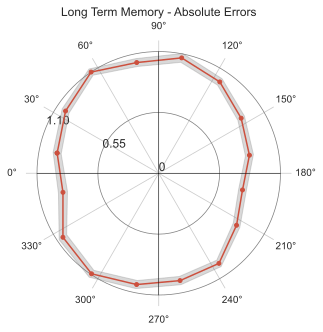

In [240]:
# Assuming df_group is your DataFrame
df_group = pd.DataFrame({
    'orientation': [11.25, 33.75, 56.25, 78.75, 101.25, 123.75, 146.25, 168.75, 
                    191.25, 213.75, 236.25, 258.75, 281.25, 303.75, 326.25, 348.75],
    'mean_signed_error': [0.028359, 0.106345, 0.036779, 0.153948, 0.127905, 
                          0.088359, 0.074537, 0.030901, -0.058689, 0.015557, 
                          -0.014299, -0.110734, -0.072526, -0.091387, -0.108713, -0.168691],
    'mean_abs_error': [0.936190, 1.012937, 1.100357, 1.020583, 1.063531, 
                       0.993344, 0.896154, 0.836038, 0.772043, 0.845933, 
                       0.979448, 0.988939, 1.025381, 1.092884, 1.041389, 0.882569],
    'sem_signed_error': [0.049996, 0.051459, 0.051459, 0.053156, 0.061495, 
                         0.051966, 0.049409, 0.048448, 0.046327, 0.048490, 
                         0.050759, 0.054979, 0.055642, 0.056915, 0.057491, 0.054665],
    'sem_abs_error': [0.036950, 0.036136, 0.033595, 0.036205, 0.040722, 
                      0.035328, 0.035216, 0.036626, 0.035253, 0.035318, 
                      0.034817, 0.037838, 0.037049, 0.037423, 0.040619, 0.041480]
})


# Convert orientation from degrees to radians for proper polar plotting
df_group['orientation'] = np.radians(df_group['orientation'])

# Calculate the dynamic y-axis limits based on the actual data range for absolute errors
max_abs_error = max(df_group['mean_abs_error'])

# Set plot style to white background
sns.set_style("white")

# Create the polar plot
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))  # create polar plot
fig.patch.set_facecolor("white")  # Set background color to white, both axis and figure

# Use the modified `circular_repulsion` function for abs errors
# We now pass is_abs_error=True to avoid negative y-values
oblique_effect(ax, df_group, ylim=max_abs_error)

# Set the title and show the plot
plt.title('Long Term Memory - Absolute Errors')
plt.show()  # Display the plot

fig.savefig('LTM_abs_Errors_High_Res.png', dpi=300, bbox_inches='tight')